In [1]:
from typing import Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data
X_train = pd.read_csv('../data/processed/X_train_preprocessed.csv')
X_test = pd.read_csv('../data/processed/X_test_preprocessed.csv')
Y_train = pd.read_csv('../data/processed/Y_train.csv')
Y_test = pd.read_csv('../data/processed/Y_test.csv')

In [3]:
def run_regression(
    model: BaseEstimator,
    X_train: pd.DataFrame,
    X_test: pd.DataFrame,
    Y_train: pd.DataFrame,
    Y_test: pd.DataFrame
) -> Tuple[float, float]:
    """
    Run a regression model and calculate RMSE for training and test sets.

    Args:
        model (BaseEstimator): The regression model to be trained and evaluated.
        X_train (pd.DataFrame): Training features.
        X_test (pd.DataFrame): Test features.
        Y_train (pd.DataFrame): Training target values.
        Y_test (pd.DataFrame): Test target values.

    Returns:
        Tuple[float, float]: A tuple containing the RMSE for training and test sets.
    """
    # Fit the model
    model.fit(X_train, Y_train.values.ravel())
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    
    return train_rmse, test_rmse

In [4]:
# Define the models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

In [5]:
# Initialize lists to store results
model_names = []
train_rmse_scores = []
test_rmse_scores = []

# Run each regression model and collect results
for name, model in regression_models.items():
    train_rmse, test_rmse = run_regression(model, X_train, X_test, Y_train, Y_test)
    model_names.append(name)
    train_rmse_scores.append(round(train_rmse, 4))
    test_rmse_scores.append(round(test_rmse, 4))

# Create DataFrame with results
results_df = pd.DataFrame({
    'Model': model_names,
    'Train RMSE': train_rmse_scores,
    'Test RMSE': test_rmse_scores
})

# Display the results
print(results_df)

                 Model  Train RMSE   Test RMSE
0    Linear Regression  56879.1819  56858.0775
1        Decision Tree      0.0000  58844.8766
2        Random Forest  16444.9170  42949.1010
3  K-Nearest Neighbors  43337.6150  52830.1813


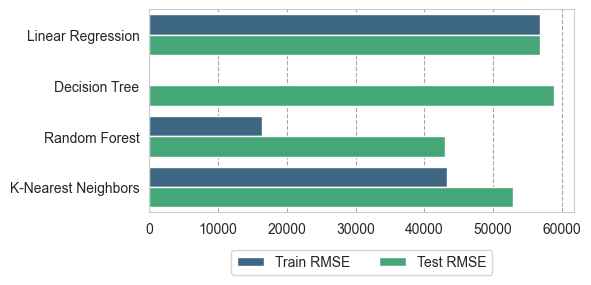

In [6]:
# Create the plot
plt.figure(figsize=(6, 3))
sns.set_style("whitegrid")

# Reshape the data for seaborn
plot_data = results_df.melt(id_vars=['Model'], var_name='RMSE Type', value_name='RMSE')

# Create the grouped bar plot
ax = sns.barplot(y='Model', x='RMSE', hue='RMSE Type', data=plot_data, palette='viridis')

# Customize the plot
plt.xlabel('')
plt.ylabel('')

# Place the legend below the plot, in a single row
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

# Add vertical lines with denser spacing
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.7)
ax.xaxis.grid(True, linestyle=':', which='minor', color='grey', alpha=0.4)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
